<a href="https://colab.research.google.com/github/habibayassermohamed0/Stroke-Prediction-App-/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [369]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import joblib
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [246]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [247]:
data.drop ('id', axis=1, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [248]:
data['gender'] = data['gender'].replace({'Female':1, 'Male':0, 'Other': np.nan})
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['gender'] = imputer.fit_transform(data[['gender']])

/tmp/ipython-input-4214614499.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace({'Female':1, 'Male':0, 'Other': np.nan})


In [249]:
data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [250]:
data['ever_married'] = data['ever_married'].replace({'Yes':1, 'No':0})

/tmp/ipython-input-1264689889.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ever_married'] = data['ever_married'].replace({'Yes':1, 'No':0})


In [251]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [252]:
data['work_type'] = data['work_type'].replace({'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4})

/tmp/ipython-input-990391008.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['work_type'] = data['work_type'].replace({'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4})


In [253]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())

In [254]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [255]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [256]:
data['smoking_status'] = data['smoking_status'].replace({'never smoked':0, 'smokes':1, 'formerly smoked':2, 'Unknown':3})

/tmp/ipython-input-1346501036.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['smoking_status'] = data['smoking_status'].replace({'never smoked':0, 'smokes':1, 'formerly smoked':2, 'Unknown':3})


In [257]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [259]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [260]:
data['Residence_type'] = data ['Residence_type'].replace({'Urban':1, 'Rural':0})

/tmp/ipython-input-3834710159.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Residence_type'] = data ['Residence_type'].replace({'Urban':1, 'Rural':0})


In [304]:
for col in data.columns:
    if all(data[col] % 1 == 0):
        data[col] = data[col].astype(int)

In [308]:
data['age'] = data['age'].astype(int)

In [312]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,1,0,1,228.69,36.6,2,1
1,1,61,0,0,1,1,0,202.21,28.1,0,1
2,0,80,0,1,1,0,0,105.92,32.5,0,1
3,1,49,0,0,1,0,1,171.23,34.4,1,1
4,1,79,1,0,1,1,0,174.12,24.0,0,1


In [314]:
x = data.drop('stroke', axis=1)
y = data['stroke']

In [315]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67,0,1,1,0,1,228.69,36.6,2
1,1,61,0,0,1,1,0,202.21,28.1,0
2,0,80,0,1,1,0,0,105.92,32.5,0
3,1,49,0,0,1,0,1,171.23,34.4,1
4,1,79,1,0,1,1,0,174.12,24.0,0
...,...,...,...,...,...,...,...,...,...,...
5105,1,80,1,0,1,0,1,83.75,28.1,0
5106,1,81,0,0,1,1,1,125.20,40.0,0
5107,1,35,0,0,1,1,0,82.99,30.6,0
5108,0,51,0,0,1,0,0,166.29,25.6,2


In [263]:
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [347]:
x = data.iloc[:, 1:10]
y = data.iloc[:, 10]

In [341]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

x = scalerX.fit_transform(x)

In [342]:
x

array([[0.        , 0.81707317, 0.        , ..., 0.80126489, 0.30126002,
        0.66666667],
       [1.        , 0.74390244, 0.        , ..., 0.67902317, 0.20389462,
        0.        ],
       [0.        , 0.97560976, 0.        , ..., 0.23451205, 0.25429553,
        0.        ],
       ...,
       [1.        , 0.42682927, 0.        , ..., 0.12865848, 0.2325315 ,
        0.        ],
       [0.        , 0.62195122, 0.        , ..., 0.51320284, 0.17525773,
        0.66666667],
       [1.        , 0.53658537, 0.        , ..., 0.13922999, 0.18213058,
        1.        ]])

In [317]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [372]:
numeric_transformer = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer_cat', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


numerical_features = ['gender', 'age', 'hypertension', 'heart_disease',
                      'ever_married', 'avg_glucose_level', 'bmi']
categorical_features = ['work_type', 'smoking_status']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

x_train_scaled = preprocessor.fit_transform(x_train)
x_test_scaled = preprocessor.transform(x_test)
numeric_transformer = Pipeline(steps=[('imputer_num', SimpleImputer(strategy='median')),])

categorical_transformer = Pipeline(steps=[
    ('imputer_cat', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [320]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [373]:
num_cols = ['gender','age','hypertension','heart_disease','ever_married','avg_glucose_level','bmi']
cat_cols = ['work_type','smoking_status']

numeric_transformer = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer_cat', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
], remainder='drop')

# Initialize the RandomForestClassifier
clf = RandomForestClassifier()

In [321]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [322]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

SVC()

In [323]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [324]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [325]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [374]:
y.value_counts()

,count
stroke,
0,4861
1,249


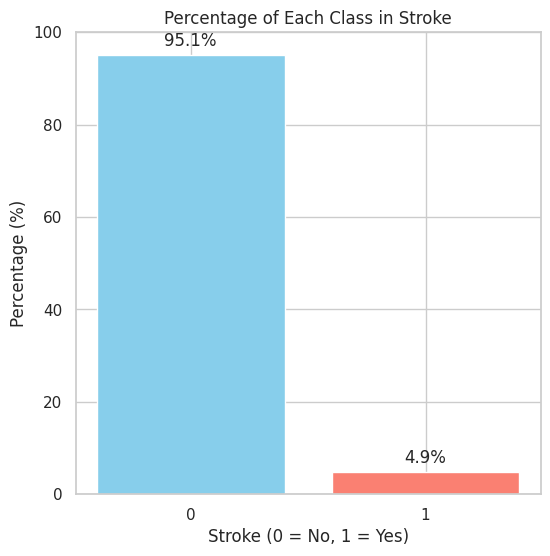

In [375]:
import matplotlib.pyplot as plt

pct = data['stroke'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))
bars = plt.bar(pct.index.astype(str), pct, color=['skyblue', 'salmon'])

for bar, value in zip(bars, pct):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 1,
        f'{value:.1f}%',
        ha='center', va='bottom', fontsize=12
    )

plt.title('Percentage of Each Class in Stroke')
plt.ylabel('Percentage (%)')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylim(0, 100)
plt.show()

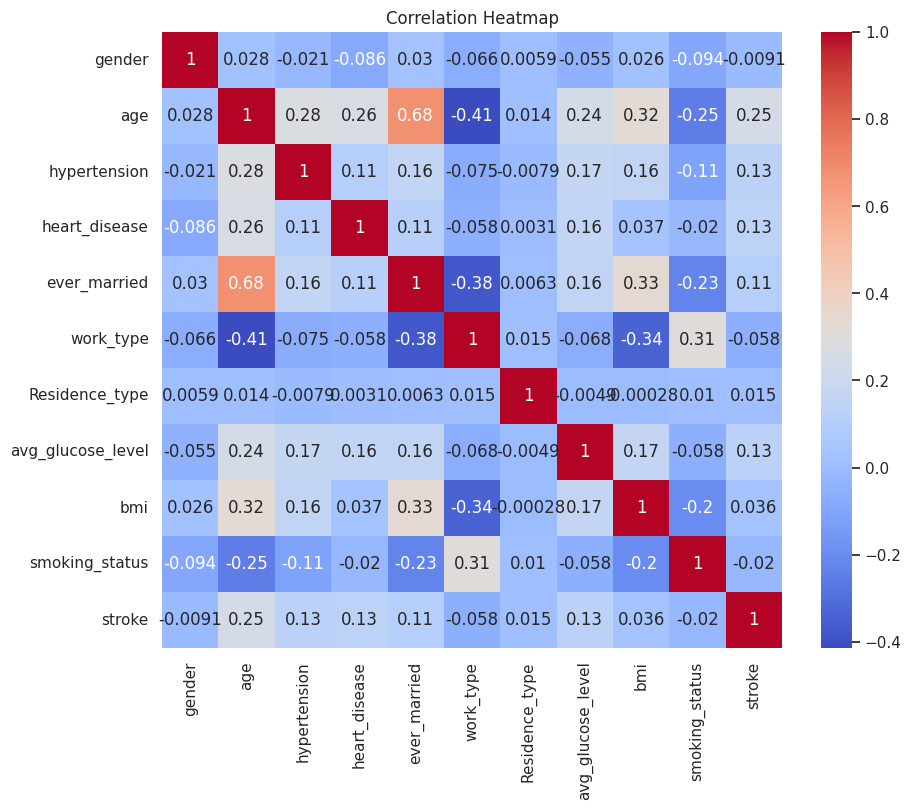

In [354]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

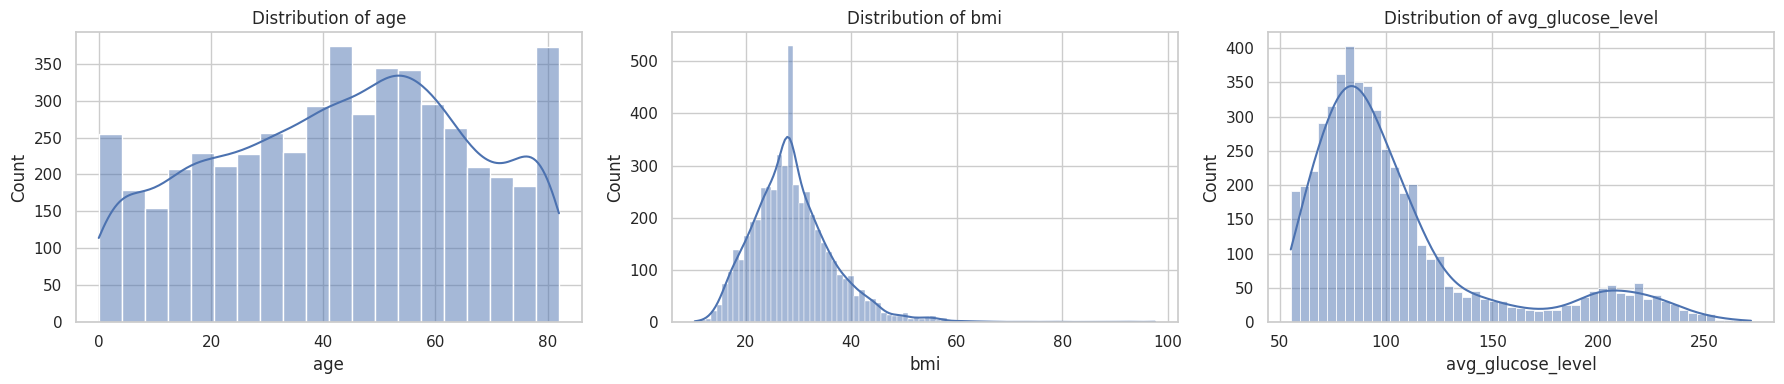

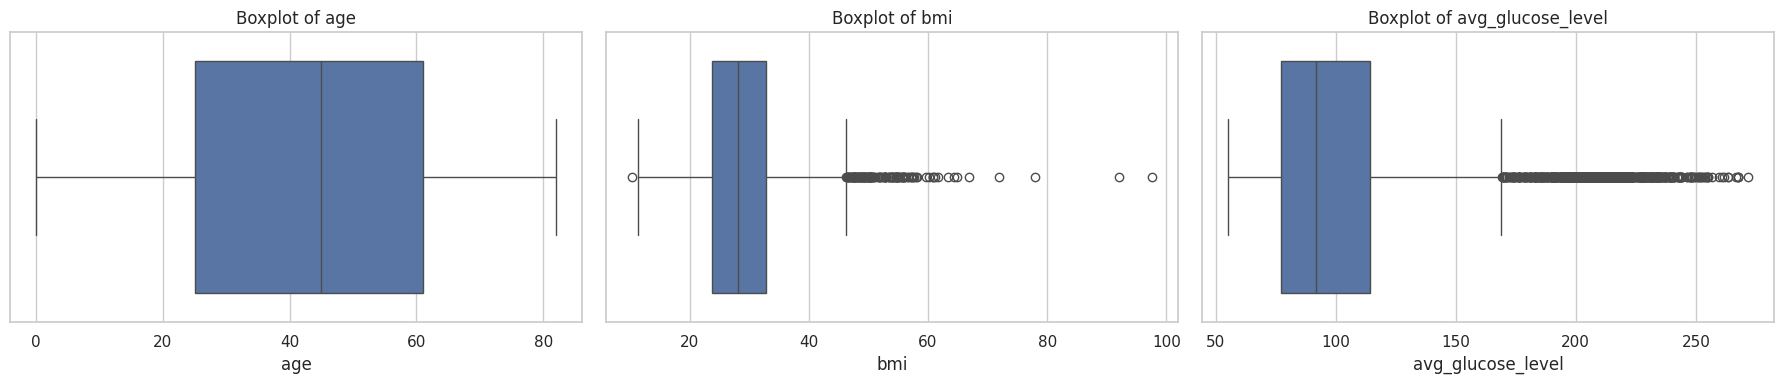

In [421]:
fig, axes = plt.subplots(1, 3, figsize=(18,4))
cols = ['age', 'bmi', 'avg_glucose_level']
for ax, col in zip(axes, cols):
    sns.histplot(data[col].dropna(), kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Step 1B — Boxplots (to check outliers)
fig, axes = plt.subplots(1, 3, figsize=(18,4))
for ax, col in zip(axes, cols):
    sns.boxplot(x=data[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

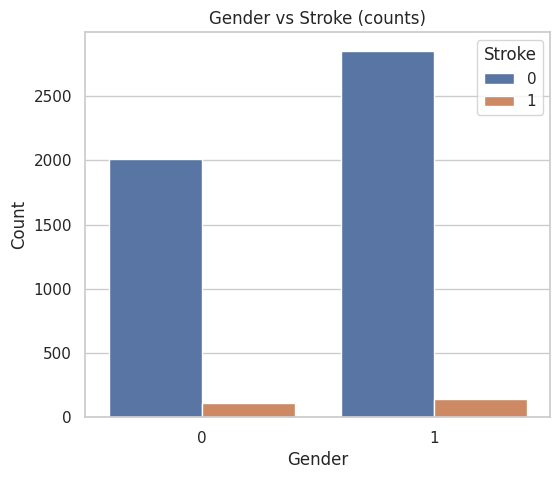

In [361]:
# gender vs stroke counts (countplot)
plt.figure(figsize=(6,5))
sns.countplot(x='gender', hue='stroke', data=data)
plt.title('Gender vs Stroke (counts)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

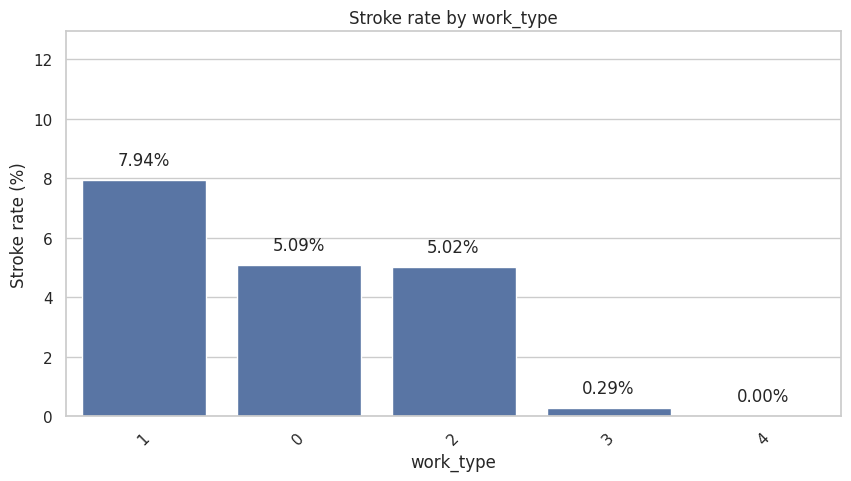

In [357]:
#work_type vs stroke rate (percentage)
work_rate = data.groupby('work_type')['stroke'].mean().reset_index()
work_rate['stroke_pct'] = work_rate['stroke'] * 100

plt.figure(figsize=(10,5))
sns.barplot(x='work_type', y='stroke_pct', data=work_rate, order=work_rate.sort_values('stroke_pct', ascending=False)['work_type'])
plt.xticks(rotation=45)
plt.ylabel('Stroke rate (%)')
plt.title('Stroke rate by work_type')
for i, v in enumerate(work_rate.sort_values('stroke_pct', ascending=False)['stroke_pct']):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center')
plt.ylim(0, work_rate['stroke_pct'].max() + 5)
plt.show()

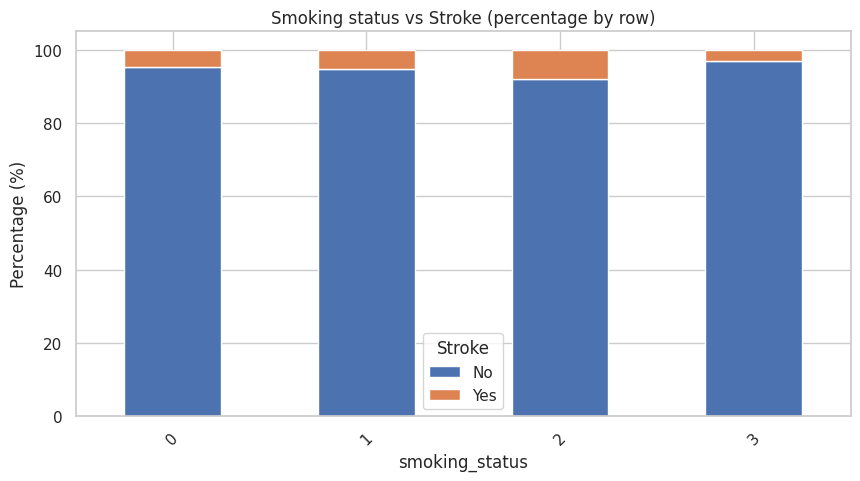

In [408]:
# smoking_status vs stroke (proportions)
ct = pd.crosstab(data['smoking_status'], data['stroke'], normalize='index') * 100
ct.plot(kind='bar', stacked=True, figsize=(10,5))
plt.ylabel('Percentage (%)')
plt.title('Smoking status vs Stroke (percentage by row)')
plt.legend(title='Stroke', labels=['No','Yes'])
plt.xticks(rotation=45)
plt.show()

In [418]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import joblib
import numpy as np


if 'x_train_scaled' in globals() and 'x_test_scaled' in globals():
    X_tr = x_train_scaled
    X_te = x_test_scaled
else:
    # fall back to transforming raw x_train/x_test with existing preprocessor
    try:
        X_tr = preprocessor.fit_transform(x_train)
        X_te = preprocessor.transform(x_test)
    except Exception as e:
        raise RuntimeError("No scaled data found and preprocessor unavailable or failed.") from e

neg = np.sum(y_train == 0)
pos = np.sum(y_train == 1)
scale_pos_weight = float(neg / pos) if pos > 0 else 1.0


model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight
)


In [419]:
model.fit(X_tr, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:25:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [433]:
y_pred = model.predict(X_te)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred, zero_division=0))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))

try:
    y_proba = model.predict_proba(X_te)[:,1]
    print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 4))
except Exception:
    print("ROC AUC: not available (predict_proba missing)")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


joblib.dump(model, '/content/best_xgb_model.joblib')
print("\nSaved model to /content/best_xgb_model.joblib")

Accuracy: 0.7915851272015656
F1: 0.27796610169491526
Precision: 0.1673469387755102
Recall: 0.82
ROC AUC: 0.8443

Confusion Matrix:
[[768 204]
 [  9  41]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9884    0.7901    0.8782       972
           1     0.1673    0.8200    0.2780        50

    accuracy                         0.7916      1022
   macro avg     0.5779    0.8051    0.5781      1022
weighted avg     0.9482    0.7916    0.8488      1022


Saved model to /content/best_xgb_model.joblib


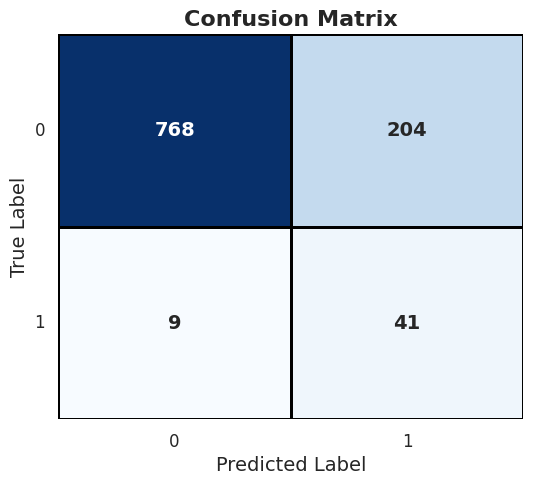

In [434]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False,
            annot_kws={"size":14, "weight":"bold"}, linewidths=1, linecolor="black")

plt.title("Confusion Matrix", fontsize=16, weight="bold")
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.show()

In [430]:
joblib.dump(model, 'best_model.pkl')

['best_model.pkl']

In [424]:
model = joblib.load('best_model.pkl')

In [436]:
import os
print(os.listdir('/content'))

['.config', 'scaler.pkl', '.gradio', 'best_model.pkl', 'best_xgb_model.joblib', 'best_pipeline.joblib', 'healthcare-dataset-stroke-data.csv', 'sample_data']


In [460]:
import joblib
import pandas as pd

model = joblib.load("/content/best_pipeline.joblib")

# Ensure column names and order match the training data
sample_data = {
    "gender": ["Female"],
    "age": [50],
    "hypertension": [0],
    "heart_disease": [1],
    "ever_married": ["Yes"],
    "work_type": ["Private"],
    "Residence_type": ["Urban"],
    "avg_glucose_level": [83.75],
    "bmi": [36.6],
    "smoking_status": ["formerly smoked"]
}

# Define the expected column order based on the original data or preprocessor's input
expected_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                    'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

sample = pd.DataFrame(sample_data, columns=expected_columns)


pred = model.predict(sample)
print("Prediction:", pred)

Prediction: [0]


In [427]:
import joblib
joblib.dump(scaler, "scaler.pkl")
scaler = joblib.load("scaler.pkl")

In [440]:
import joblib, pandas as pd, os
print(os.listdir("/content"))

try:
    model = joblib.load("/content/best_pipeline.joblib")
    print("Loaded pipeline — good. Pipeline? ", hasattr(model, "named_steps"))
except Exception as e:
    print("No pipeline or failed to load best_pipeline:", e)
    model = None

if model is None:
    try:
        model2 = joblib.load("/content/best_xgb_model.joblib")
        print("Loaded raw model type:", type(model2))
    except Exception as e:
        print("Failed to load raw model:", e)


['.config', 'scaler.pkl', '.gradio', 'best_model.pkl', 'best_xgb_model.joblib', 'best_pipeline.joblib', 'healthcare-dataset-stroke-data.csv', 'sample_data']
Loaded pipeline — good. Pipeline?  True


In [453]:
!pip install gradio joblib pandas scikit-learn xgboost imbalanced-learn

In [454]:
import os, joblib
print("Files in /content (or current dir):", os.listdir("/content"))

MODEL_PATH = "/content/best_pipeline.joblib"
assert os.path.exists(MODEL_PATH), f"Model not found at {MODEL_PATH}"
model = joblib.load(MODEL_PATH)
print("Loaded model type:", type(model))
print("Has predict:", hasattr(model, "predict"), "Has predict_proba:", hasattr(model, "predict_proba"))


Files in /content (or current dir): ['.config', 'scaler.pkl', '.gradio', 'best_model.pkl', 'best_xgb_model.joblib', 'best_pipeline.joblib', 'healthcare-dataset-stroke-data.csv', 'sample_data']
Loaded model type: <class 'imblearn.pipeline.Pipeline'>
Has predict: True Has predict_proba: True


In [456]:
import os, joblib, pandas as pd, gradio as gr, traceback, sys

MODEL_PATH = "/content/best_pipeline.joblib"
print("Files:", os.listdir("/content"))
model = joblib.load(MODEL_PATH)
print("Loaded model type:", type(model))

gender_map = {"Male": 0, "male": 0, "Female": 1, "female": 1}
ever_map   = {"No": 0, "no": 0, "Yes": 1, "yes": 1}


def predict_stroke_safe(gender, age, hypertension, heart_disease, ever_married,
                        work_type, residence_type, avg_glucose_level, bmi, smoking_status):
    try:

        if isinstance(gender, str):
            if gender in gender_map:
                g_val = gender_map[gender]
            else:

                try:
                    g_val = float(gender)
                except:
                    return f"Error: unknown gender '{gender}'. Expected Male/Female/Other or numeric encoding."
        else:
            g_val = gender

        # ever_married
        if isinstance(ever_married, str):
            if ever_married in ever_map:
                em_val = ever_map[ever_married]
            else:
                try:
                    em_val = float(ever_married)
                except:
                    return f"Error: unknown ever_married '{ever_married}'. Expected Yes/No or numeric."
        else:
            em_val = ever_married
        row = {
            "gender": g_val,
            "age": float(age),
            "hypertension": int(hypertension),
            "heart_disease": int(heart_disease),
            "ever_married": em_val,
            "work_type": work_type,
            "Residence_type": residence_type,
            "avg_glucose_level": float(avg_glucose_level),
            "bmi": float(bmi),
            "smoking_status": smoking_status
        }
        df = pd.DataFrame([row])
        print("INPUT dtypes:\n", df.dtypes)
        print("INPUT row:", df.to_dict(orient='records')[0])

        pred = model.predict(df)[0]
        prob = None
        if hasattr(model, "predict_proba"):
            try:
                prob = float(model.predict_proba(df)[:,1][0])
            except Exception as e:
                print("predict_proba error:", e)

        label = "Stroke" if int(pred) == 1 else "No Stroke"
        if prob is None:
            return f"Prediction: {label}"
        return f"Prediction: {label}  (P={prob:.3f})"

    except Exception as e:
        traceback.print_exc(file=sys.stdout)
        return f"Internal error: {str(e)} — check notebook output for traceback."

iface = gr.Interface(
    fn=predict_stroke_safe,
    inputs=[
        gr.Radio(["Male","Female","Other"], label="Gender"),
        gr.Number(value=50, label="Age"),
        gr.Radio([0,1], label="Hypertension (1=yes)"),
        gr.Radio([0,1], label="Heart Disease (1=yes)"),
        gr.Radio(["Yes","No"], label="Ever Married"),
        gr.Dropdown(["Private","Self-employed","Govt_job","children","Never_worked"], label="Work Type"),
        gr.Radio(["Urban","Rural"], label="Residence Type"),
        gr.Number(value=100.0, label="Avg Glucose Level"),
        gr.Number(value=25.0, label="BMI"),
        gr.Dropdown(["formerly smoked","never smoked","smokes","Unknown"], label="Smoking Status"),
    ],
    outputs=gr.Textbox(label="Result"),
    title="Stroke Prediction (fixed)",
    description="App coerces inputs to the encoding the pipeline expects."
)

iface.launch(share=True)


Files: ['.config', 'scaler.pkl', '.gradio', 'best_model.pkl', 'best_xgb_model.joblib', 'best_pipeline.joblib', 'healthcare-dataset-stroke-data.csv', 'sample_data']
Loaded model type: <class 'imblearn.pipeline.Pipeline'>
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://45985917b61c458fbd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
